In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer
from neuralplayground.plotting.plot_utils import make_plot_trajectories , make_plot_rate_map, make_agent_comparison

# Different Agents in Same env


## 2D env

/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig19'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1191'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.1237'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>]],
      dtype=object)

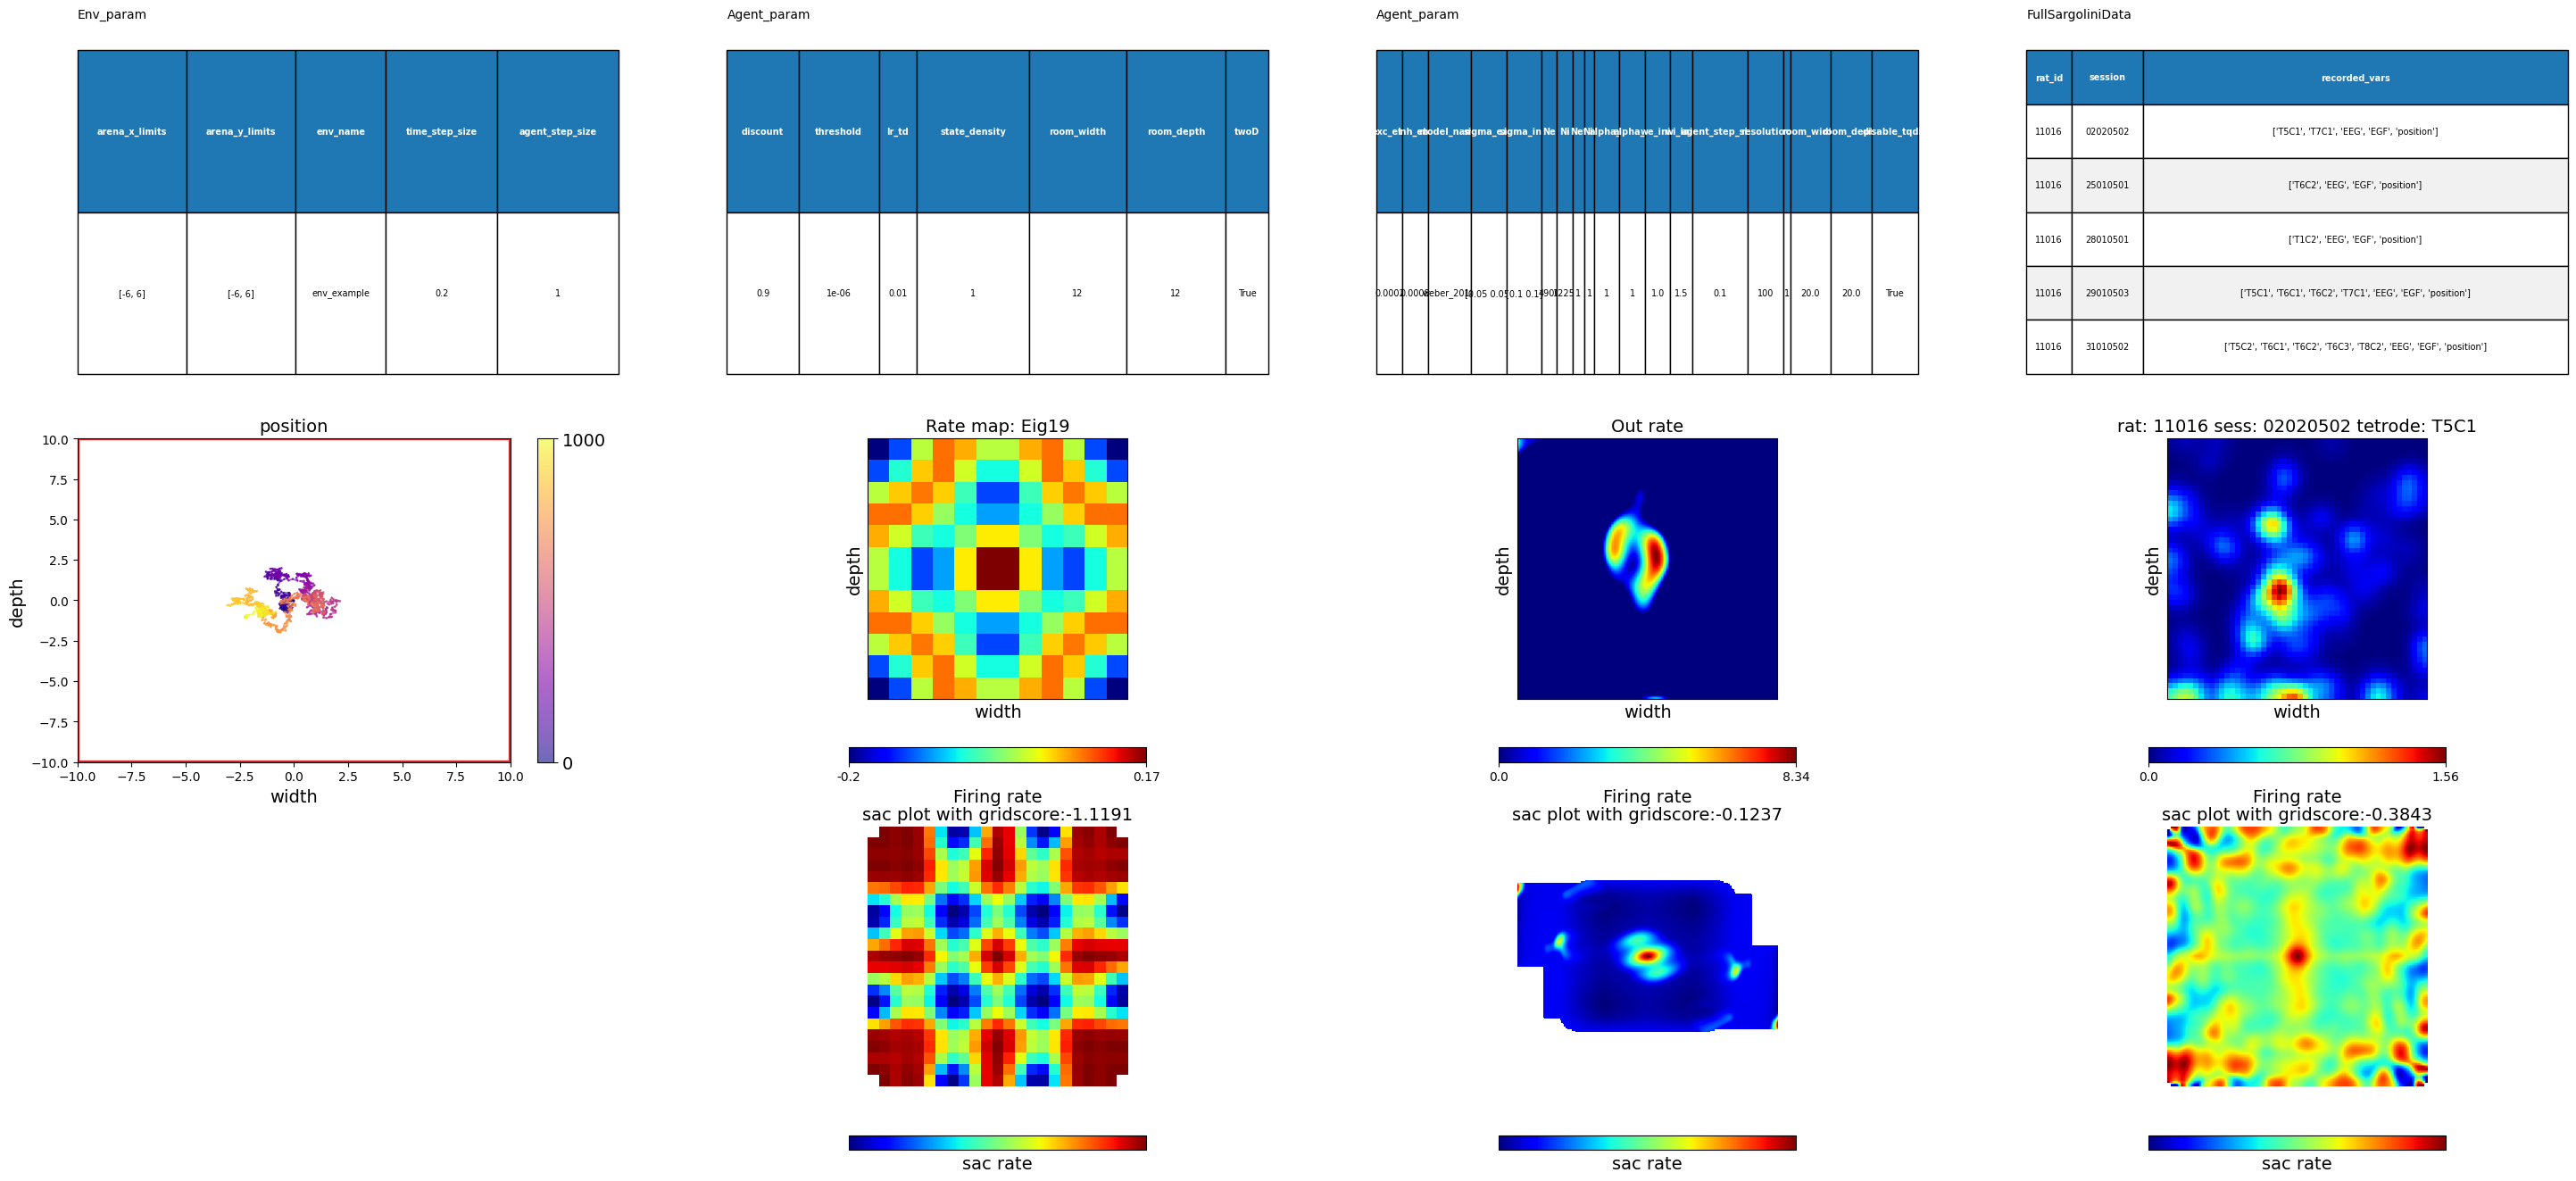

In [8]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/arena"

agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/arena"


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]
exp=[exp]

make_agent_comparison(env, parameters,agents, exps=exp , recording_index=0,GridScorer=GridScorer)


## Sargolini env

/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig19'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1442'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.2076'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >]], dtype=object)

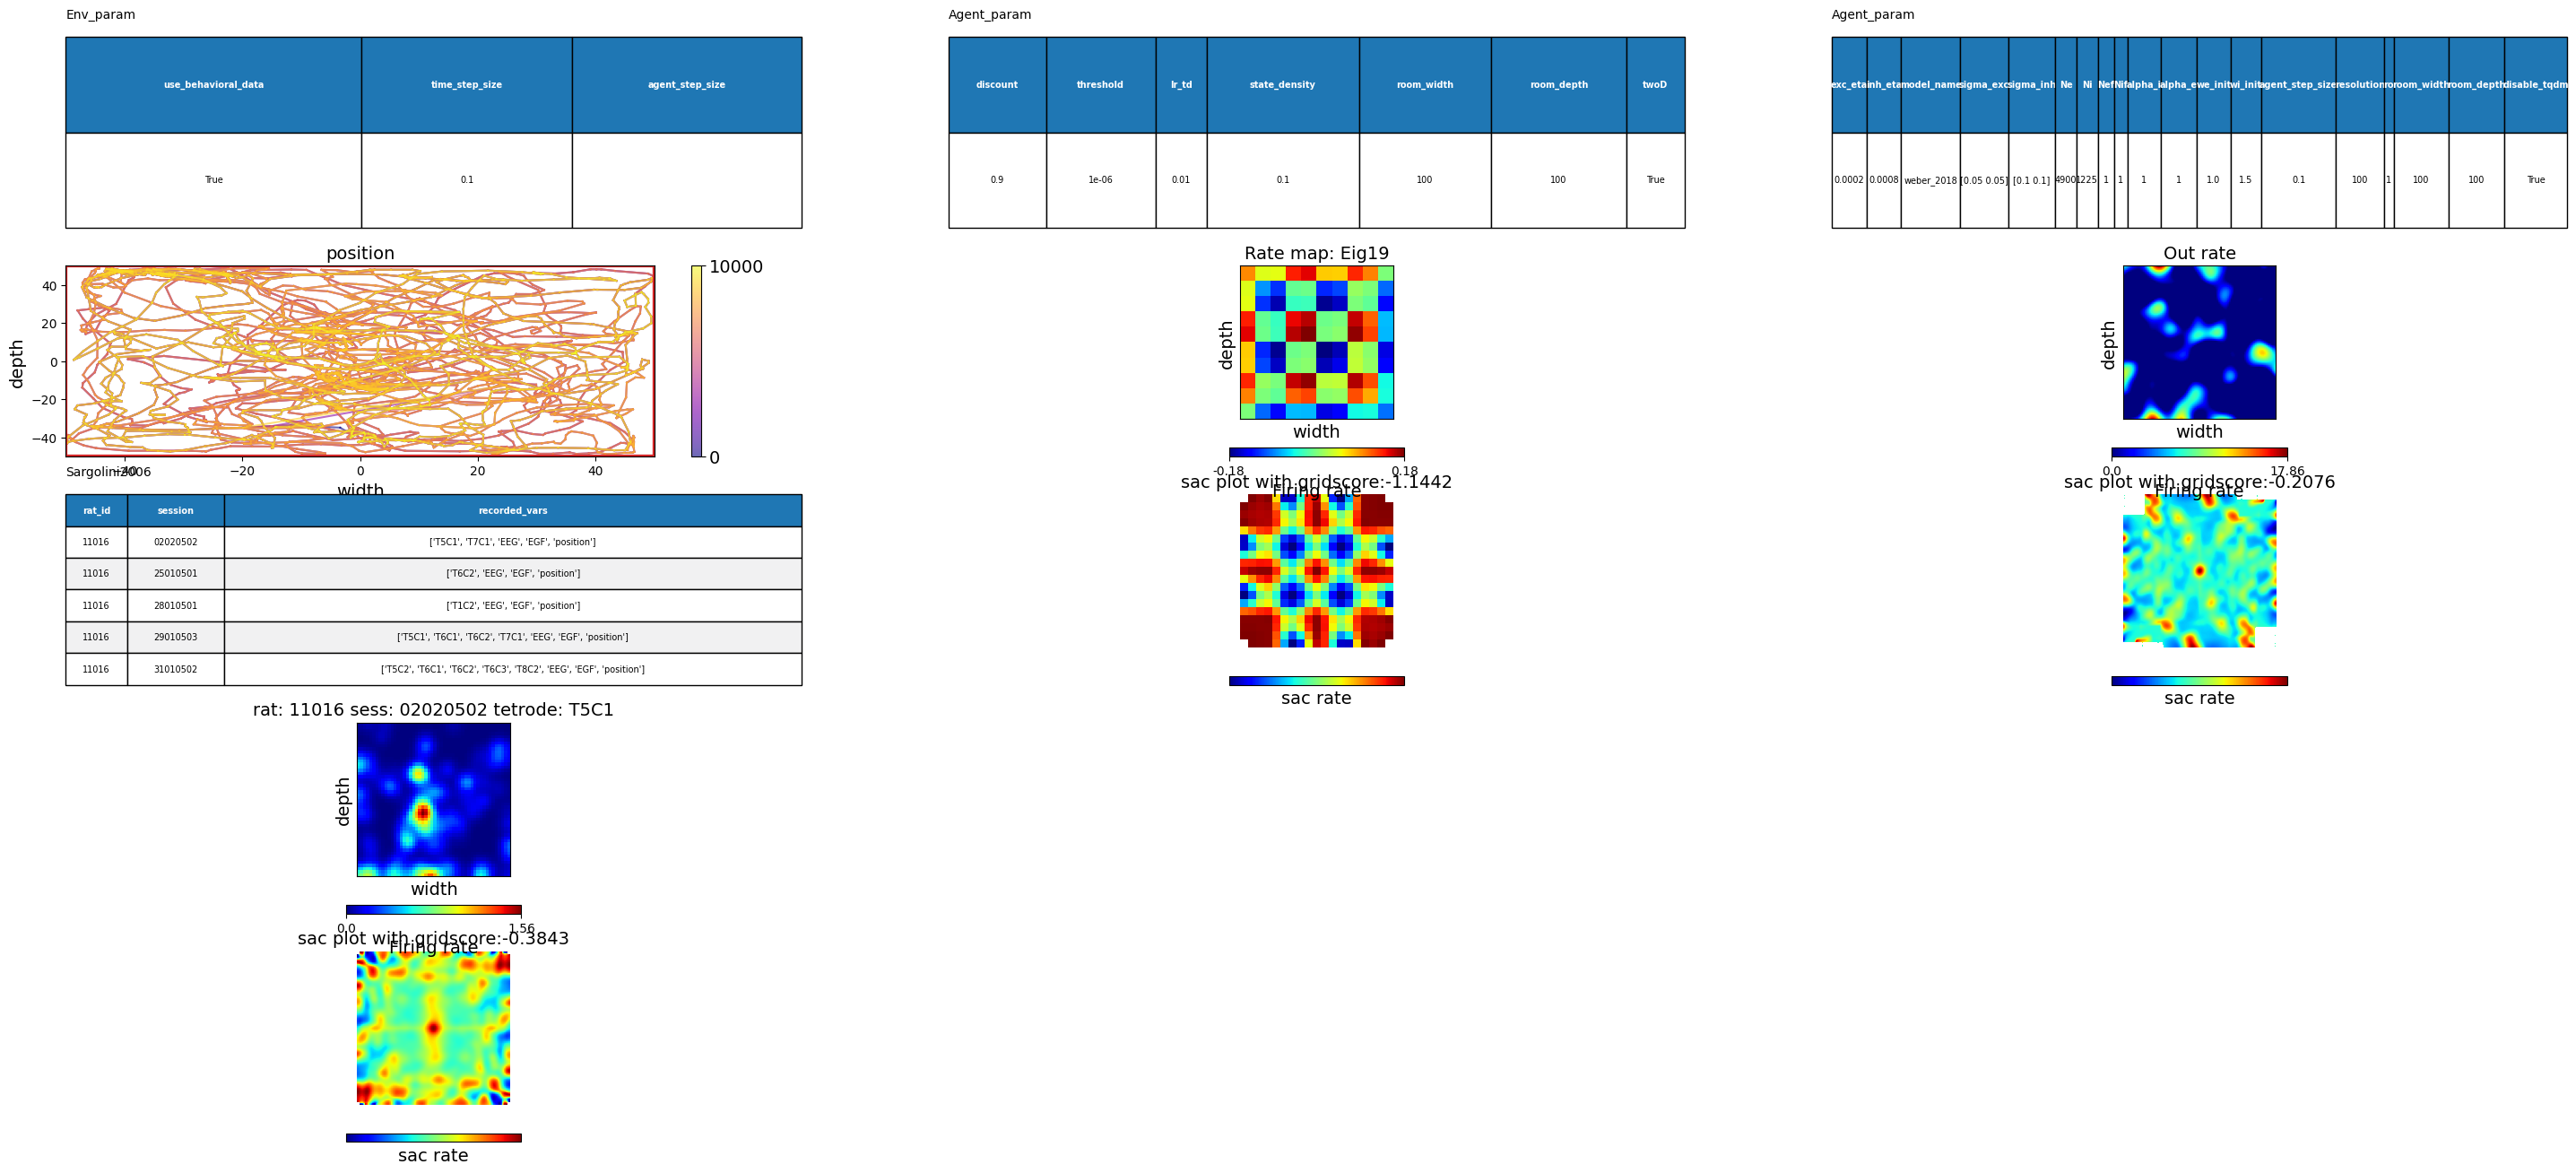

In [9]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Sargolini2006/run_0_22-07-2023_14-02-02-394/arena"


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env = pd.read_pickle(arena_path)

agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/arena"



agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


agents=[agent_sr,agent]
parameters=[param_sr,param]
exp = Sargolini2006Data(verbose=False)
env=[env]

make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


## Hafting env

/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:517: RuntimeWarning: All-NaN slice encountered
  in_range = (np.nanmin(image), np.nanmax(image))
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:521: UserWarning: One or more intensity levels are NaN. Rescaling will broadcast NaN to the full image. Provide intensity levels yourself to avoid this. E.g. with np.nanmin(image), np.nanmax(image).
  autoCorrMiddleRescaled = skimage.exposure.rescale_intensity(image, in_range, out_range)
/Users/clementine/miniconda3/envs/NPG/lib/

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig19'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'rat: 11015 sess: 13120410 tetrode: t5c1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.0098'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:0.00

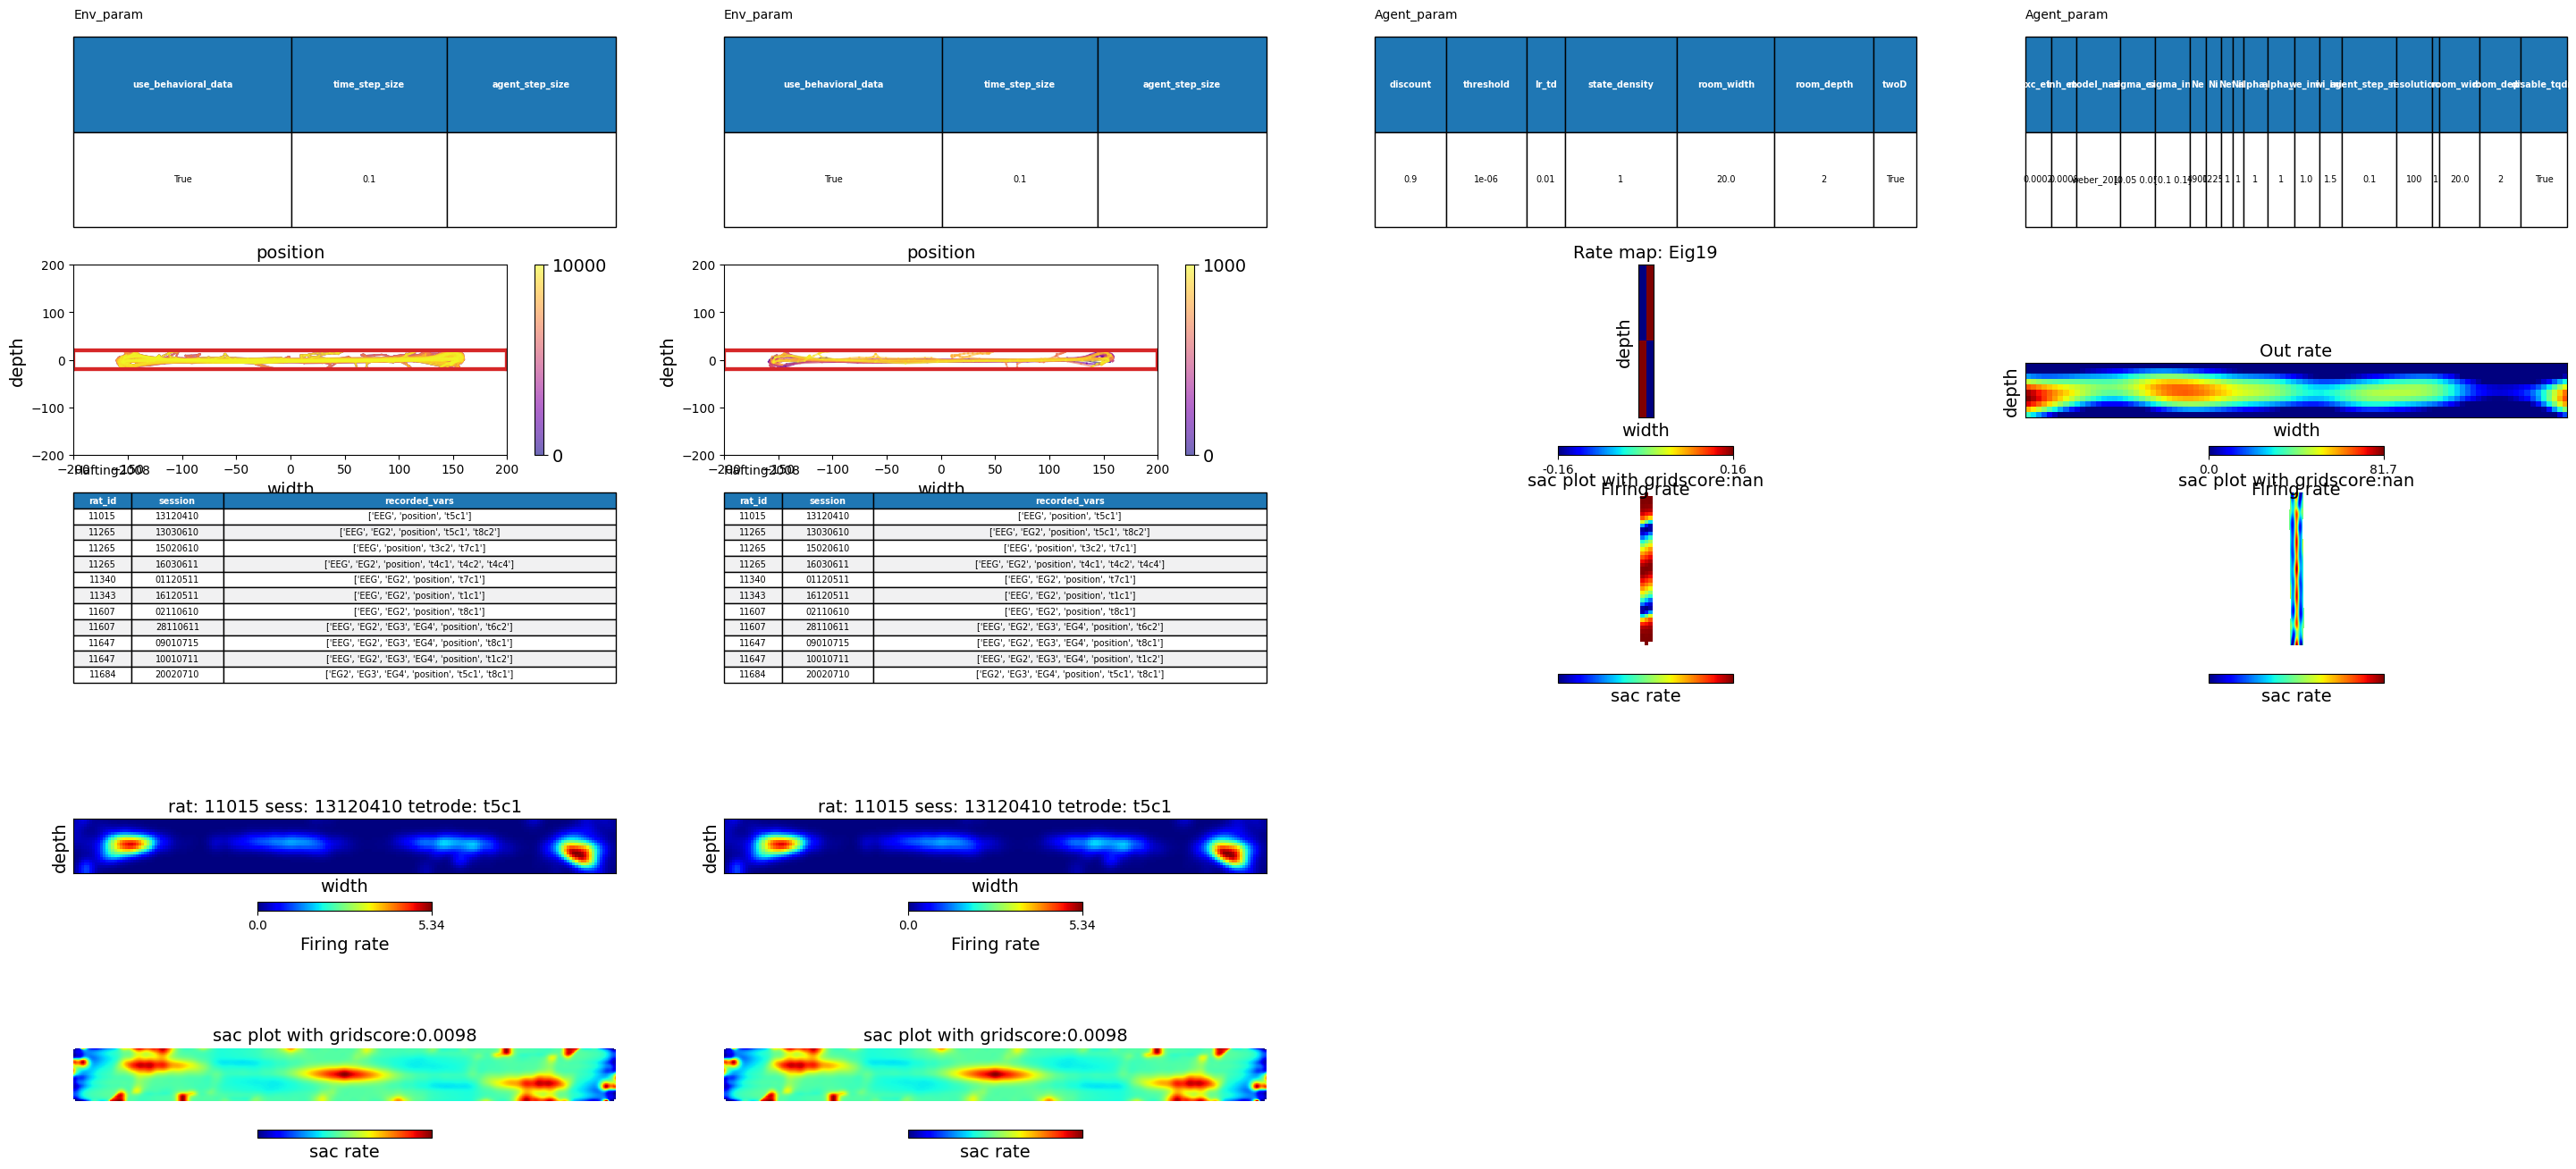

In [10]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_Hafting2008/run_0_22-07-2023_14-06-26-940/arena"


agent_sr = pd.read_pickle(agent_path)
param_sr = pd.read_pickle(param_path)
env_sr = pd.read_pickle(arena_path)


agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/arena"


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)

agents=[agent_sr,agent]
parameters=[param_sr,param]
env=[env_sr,env]


make_agent_comparison(env, parameters,agents,  recording_index=0,GridScorer=GridScorer)



## Wernle 

# Train same agent in Different envs


## Weber

/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: divide by zero encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/skimage/exposure/exposu

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.1237'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.2076'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:nan'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'

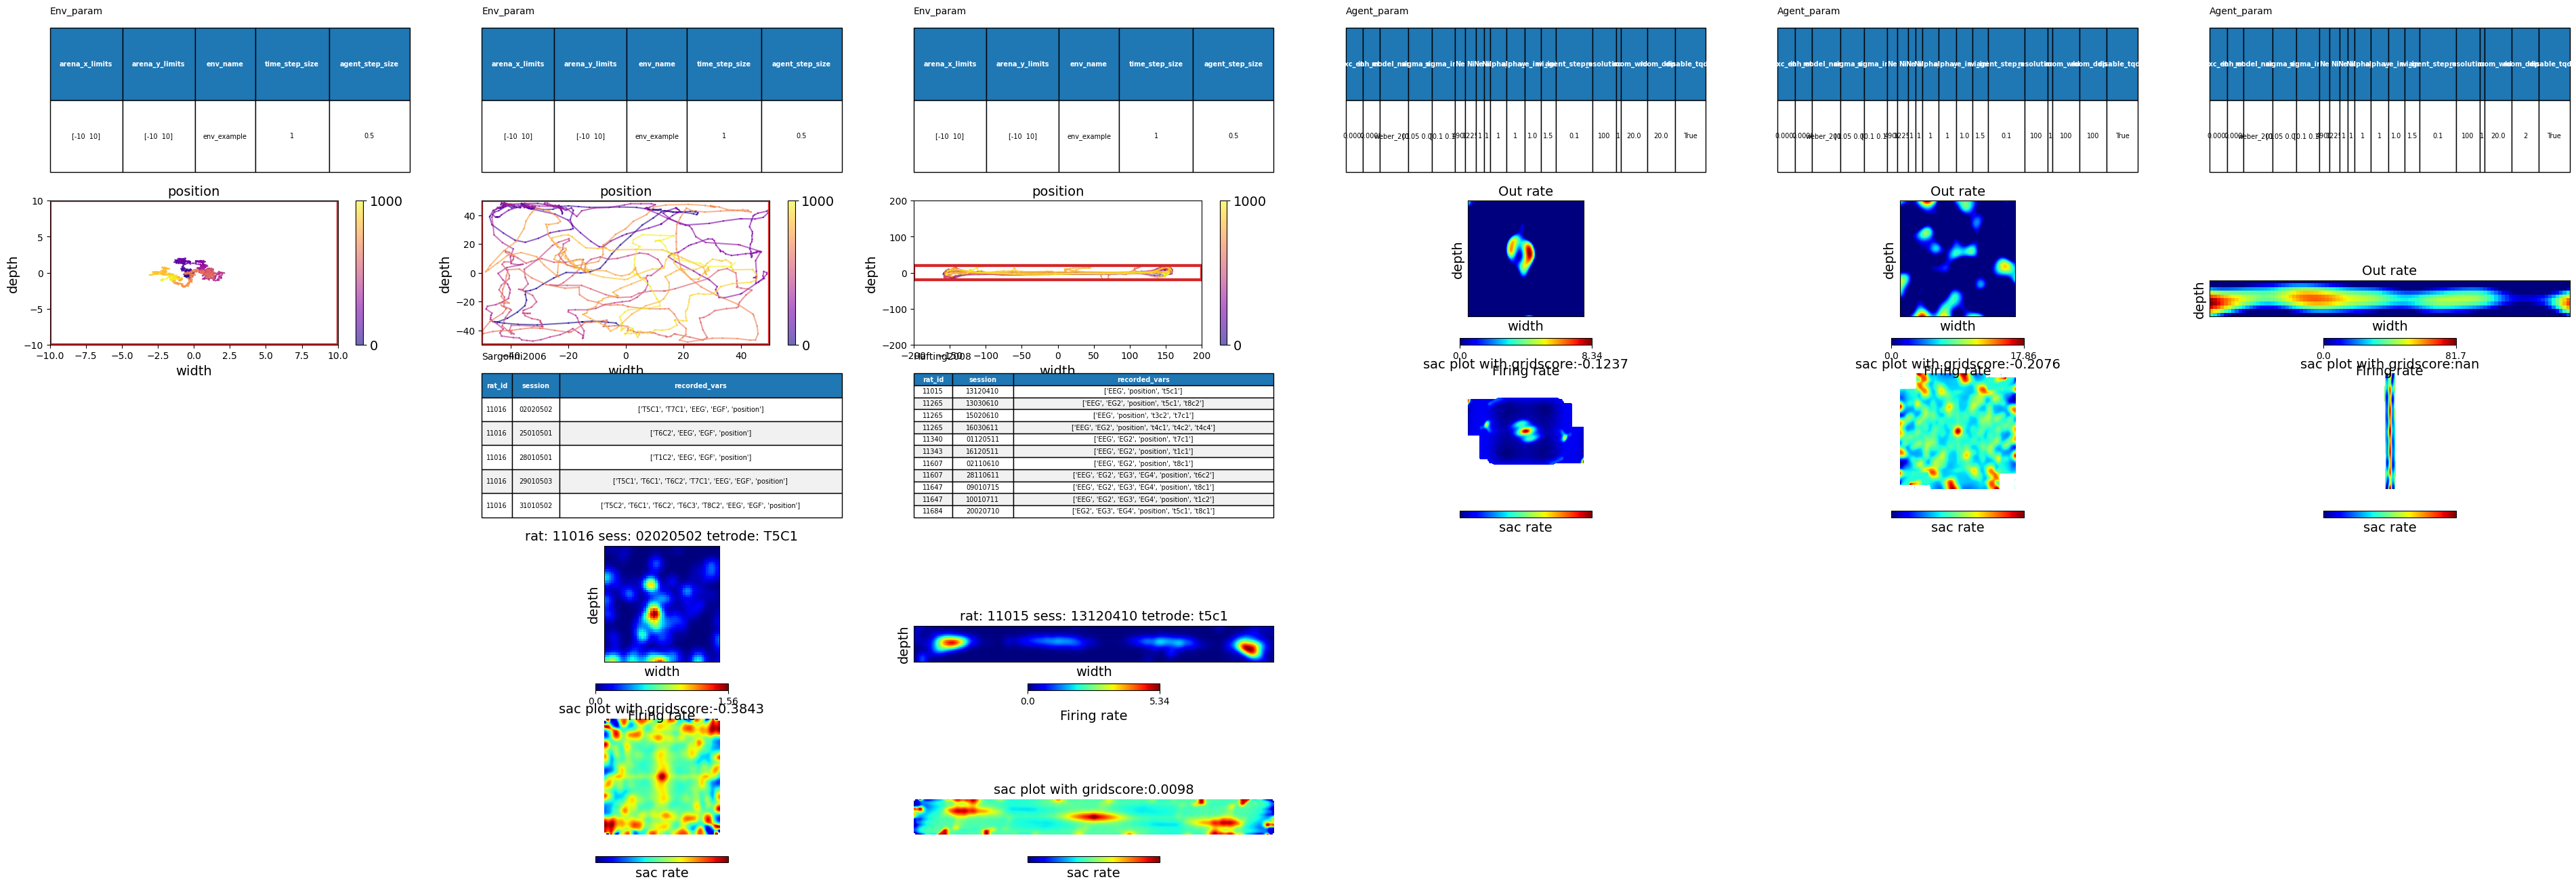

In [11]:
# Different Seed
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_simple2D/run_0_22-07-2023_14-00-05-141/arena"


agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)

# Different Seed
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Hafting2008/run_0_22-07-2023_14-07-33-242/arena"


env_H = pd.read_pickle(arena_path)
agent_H = pd.read_pickle(agent_path)
param_H = pd.read_pickle(param_path)

# Different Env
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/arena"


env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)



agents=[agent_2d,agent,agent_H]
parameters=[param_2d,param,param_H]
env=[env_2d,env, env_H]



make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)




## Stackenfeld

/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Rate map: Eig19'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-1.1191'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.2076'}, xlabel='width', ylabel='depth'>],
       [<Axes: >,
        <Axes: title={'center': 'rat: 11016 sess: 02020502 tetrode: T5C1'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >],
       [<Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.3843'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >]], dtype=object)

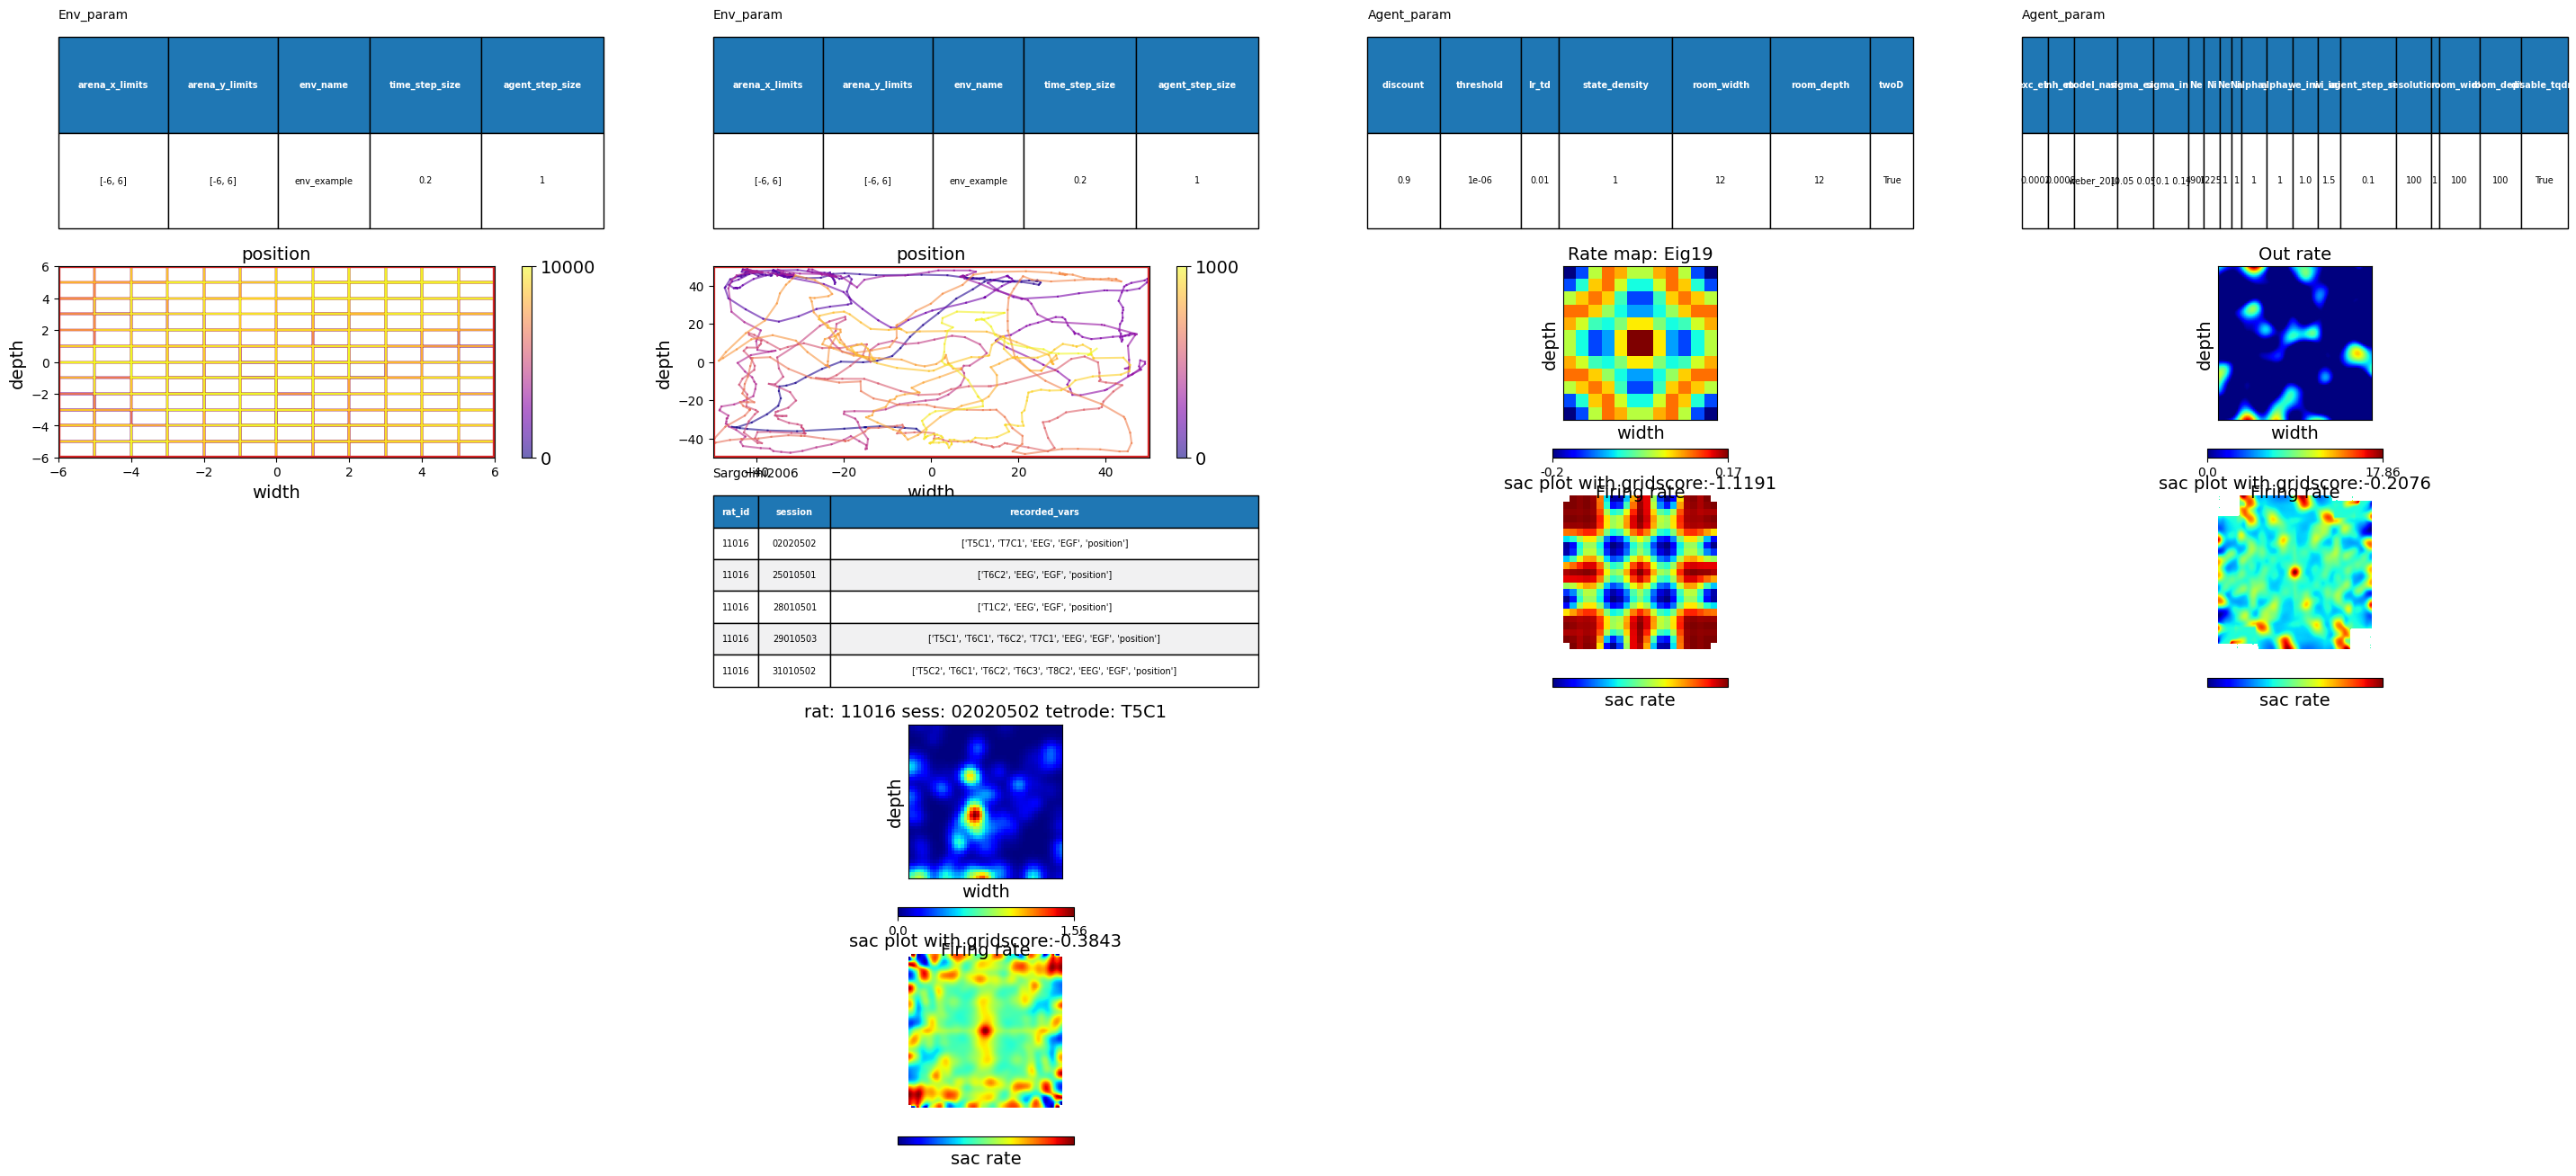

In [12]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/stachenfeld_2018_in_simple2D/run_0_22-07-2023_14-00-45-359/arena"


agent_2d = pd.read_pickle(agent_path)
param_2d = pd.read_pickle(param_path)
env_2d = pd.read_pickle(arena_path)



agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Sargolini2006/run_0_22-07-2023_14-02-22-826/arena"


agent_S = pd.read_pickle(agent_path)
param_S = pd.read_pickle(param_path)
env_S = pd.read_pickle(arena_path)


agents=[agent_2d,agent_S]
parameters=[param_2d,param_S]
env=[env_2d,env_S]


make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)


# Merging Room environment


/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:120: RuntimeWarning: invalid value encountered in sqrt
  mapStd = np.sqrt((sumOfSquares_x * N) - sums_x**2)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
       [<Axes: >, <Axes: >,
        <Axes: title={'center': 'sac plot with gridscore:-0.1696'}, xlabel='width', ylabel='depth'>,
        <Axes: title={'center': 'sac plot with gridscore:-0.0556'}, xlabel='width', ylabel='depth'>],
       [<Axes: title={'center': 'sess_index_0_merged'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: title={'center': 'sac plot with gridscore:0.791'}, xlabel='width', ylabel='depth'>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

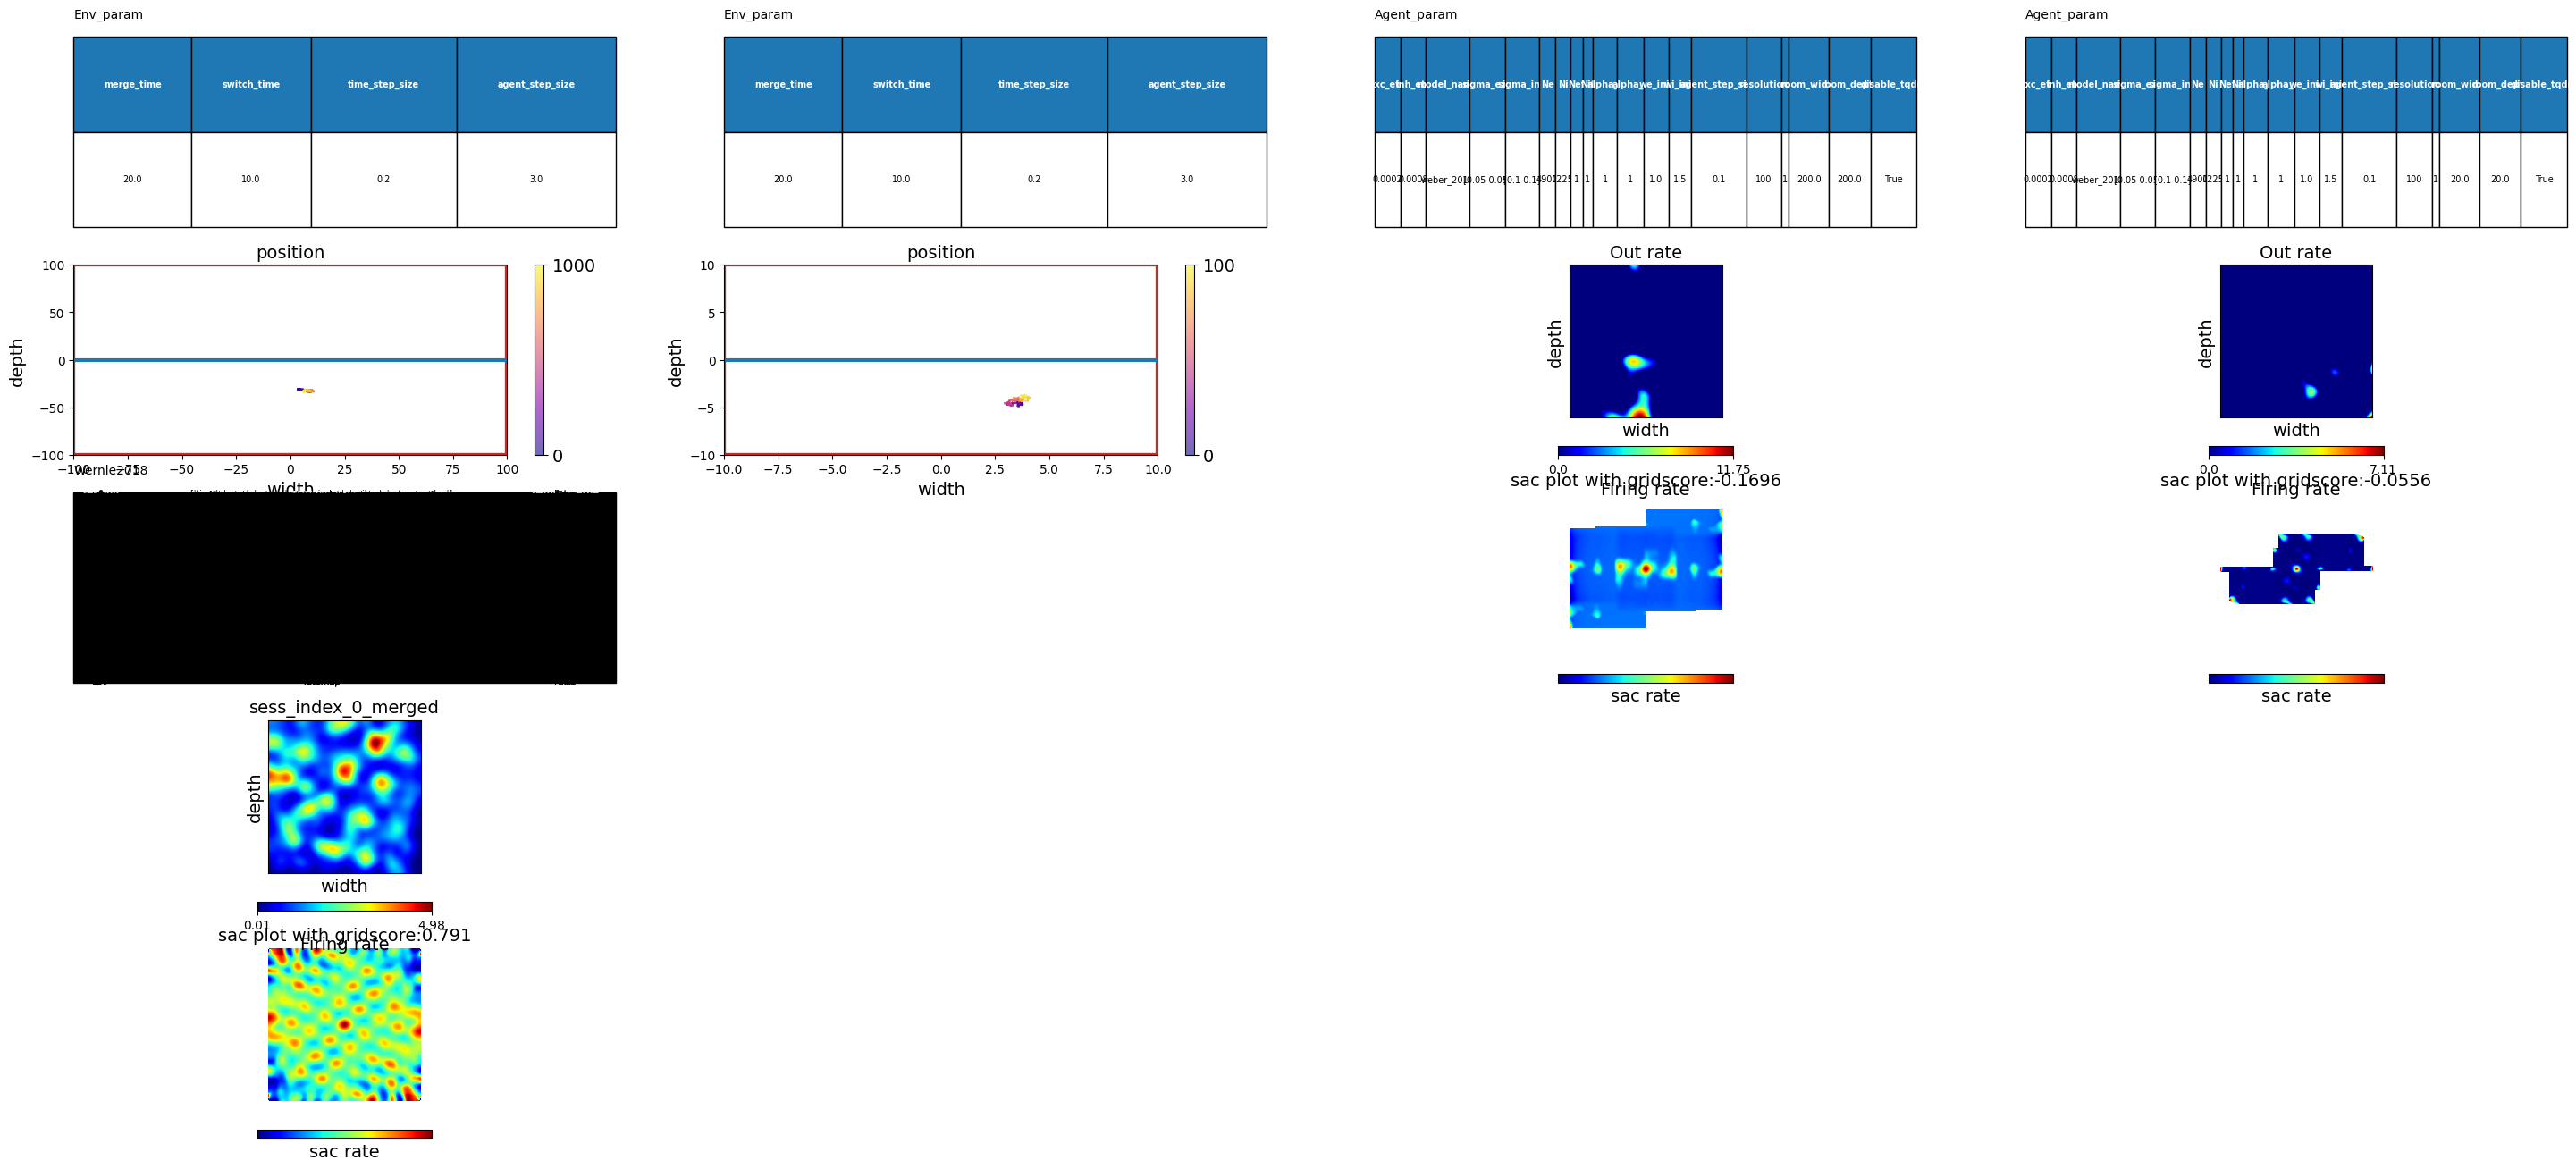

In [13]:
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Merging_Room/run_4_11-07-2023_20-19-19-306/arena"



env = pd.read_pickle(arena_path)
agent = pd.read_pickle(agent_path)
param = pd.read_pickle(param_path)


# Different Env
agent_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_22-07-2023_14-08-12-768/agent"
param_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_22-07-2023_14-08-12-768/params.dict"
arena_path ="/Users/clementine/Documents/UCL/lectures/NeuralPlayground/debugging/test_dev/weber_2018_in_Wernle/run_0_22-07-2023_14-08-12-768/arena"

agent_W = pd.read_pickle(agent_path)
param_W = pd.read_pickle(param_path)
env_W = pd.read_pickle(arena_path)


agents=[agent_W,agent]
parameters=[param_W,param]
env=[env_W, env]
make_agent_comparison(env, parameters,agents, recording_index=0,GridScorer=GridScorer)






